
Random Forest:
Accuracy: 0.8535
Precision: 0.8012048192771084
Recall: 0.3384223918575064
F1 Score: 0.47584973166368516


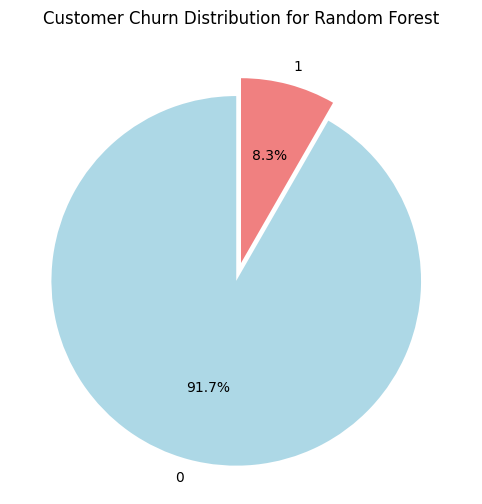


Logistic Regression:
Accuracy: 0.809
Precision: 0.5364238410596026
Recall: 0.20610687022900764
F1 Score: 0.2977941176470588


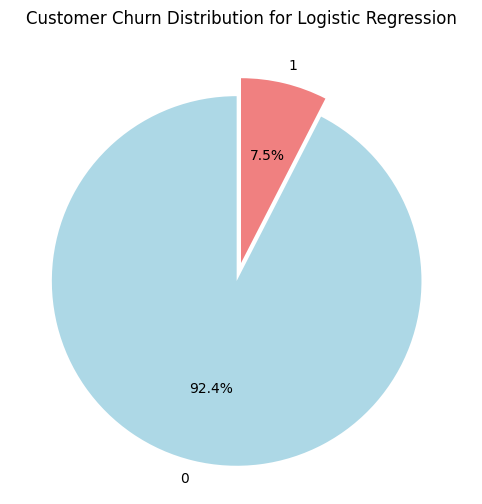


Gradient Boosting:
Accuracy: 0.86
Precision: 0.728744939271255
Recall: 0.4580152671755725
F1 Score: 0.5625


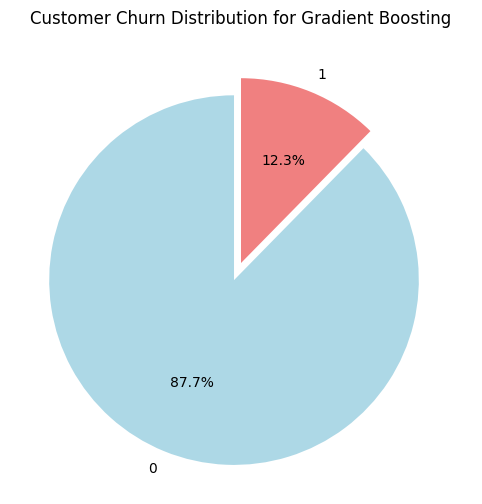

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Read the data
data = pd.read_csv("/content/Churn_Modelling.csv")
features = data.drop("Exited", axis=1)
target = data["Exited"]

# Identify numerical and categorical columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Define the transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model and plot pie charts
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"\n{name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    X_test_processed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_processed)
    churn_counts = pd.Series(y_pred).value_counts()

    plt.figure(figsize=(8, 6))
    churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'], explode=(0.1, 0))
    plt.title(f'Customer Churn Distribution for {name}')
    plt.ylabel('')
    plt.show()
